# Student Information Analysis Project

## Overview

This project analyzes a dataset containing student information to uncover insights that can guide academic and administrative decisions. 

## Business Questions

1. Which department has the highest average GPA, and how does it vary across departments?
2. What is the relationship between GPA and student age?
3. How does GPA correlate with graduation year?

## Methodology

We will follow the CRISP-DM process to answer these questions, ensuring the code and analysis are well-documented and readable.

Dataset from [Kaggle](https://www.kaggle.com/datasets/zeeshier/student-information-dataset)


## Dataset overview 

**Rows:** 200 (students)

**Columns:** 7

**StudentID:** A unique identifier for each student.

**Name:** The student's full name.

**Age:** Age of the student.

**Email:** The email address of the student.

**Department:** The academic department.

**GPA:** The student's grade point average.

**GraduationYear:** The expected graduation year.



## Step 1: Business Understanding

### Objective
The goal is to extract meaningful insights from student data to inform decision-making.

### Key Questions

1. **Which department has the highest average GPA, and how does it vary across departments?**
2. **What is the relationship between GPA and student age?**
3. **How does GPA correlate with graduation year?**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Data Understanding

In [2]:
# Load the dataset
df = pd.read_csv("Students.csv")



In [3]:
df.shape   #check how many rows and coulmns 

(200, 7)

In [4]:
# Display dataset information
print("Dataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   StudentID       200 non-null    int64  
 1   Name            200 non-null    object 
 2   Age             200 non-null    int64  
 3   Email           200 non-null    object 
 4   Department      200 non-null    object 
 5   GPA             200 non-null    float64
 6   GraduationYear  200 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 11.1+ KB
None


In [5]:
# Display the first few rows
print("\nFirst 5 Rows:")
print(df.head())




First 5 Rows:
   StudentID               Name  Age                          Email  \
0       3336       David Palmer   19             sean43@hotmail.com   
1       8774       Andrew Roach   23             vbecker@harvey.com   
2       1396  Jonathan Gonzalez   22           hollydavis@gmail.com   
3       6716     Kenneth Morrow   24  ganderson@wheeler-atkins.info   
4       8830   Kaitlyn Martinez   18           hayesdiane@gmail.com   

    Department   GPA  GraduationYear  
0  Mathematics  3.16            2026  
1    Chemistry  3.75            2027  
2      Physics  2.95            2027  
3      Physics  3.55            2029  
4    Chemistry  2.29            2025  


In [6]:
# Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
         StudentID         Age        GPA  GraduationYear
count   200.000000  200.000000  200.00000      200.000000
mean   5726.460000   21.580000    3.02785     2027.180000
std    2507.407622    2.267002    0.59112        2.011924
min    1066.000000   18.000000    2.00000     2024.000000
25%    3693.000000   20.000000    2.52500     2025.000000
50%    5641.000000   22.000000    3.08000     2027.000000
75%    8025.750000   24.000000    3.51000     2029.000000
max    9985.000000   25.000000    3.99000     2030.000000


In [7]:
df.isnull()   #check if there is any null values

,StudentID,Name,Age,Email,Department,GPA,GraduationYear
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False


### Observations
1. The dataset contains 200 rows and 7 columns.
2. Columns include student ID, name, age, email, department, GPA, and graduation year.
3. No missing values are present.
4. Further cleaning is required to address duplicates and irrelevant columns (e.g., `Name`, `Email`).


## Step 3: Data Preparation

In [8]:
# Remove duplicates
df_cleaned = df.drop_duplicates()
print(f"Duplicates after cleaning: {df_cleaned.duplicated().sum()}")

# Drop irrelevant columns
df_cleaned = df_cleaned.drop(columns=['StudentID', 'Name', 'Email'])
print("\nCleaned Dataset Preview:")
print(df_cleaned.head())


Duplicates after cleaning: 0

Cleaned Dataset Preview:
   Age   Department   GPA  GraduationYear
0   19  Mathematics  3.16            2026
1   23    Chemistry  3.75            2027
2   22      Physics  2.95            2027
3   24      Physics  3.55            2029
4   18    Chemistry  2.29            2025


### Data Cleaning Steps
1. Removed 1 duplicate row.
2. Dropped columns: `StudentID`, `Name`, and `Email` (not relevant for analysis).


## Step 4: Analysis, Modeling, and Visualization

1. **Which department has the highest average GPA, and how does it vary across departments?**

Average GPA by Department:
 Department
Physics             3.123922
Mathematics         3.080667
Computer Science    3.044348
Chemistry           2.936304
Biology             2.915556
Name: GPA, dtype: float64


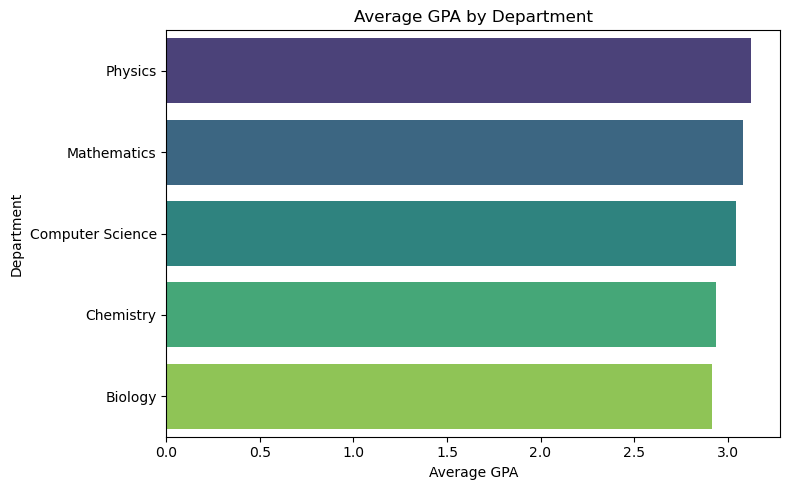

In [9]:
def average_gpa(data):
    """
    Calculate and visualize the average GPA by department.

    This function groups the provided dataset by the 'Department' column, calculates
    the mean GPA for each department, sorts the results in descending order, and 
    visualizes the averages using a bar plot.

    Parameters:
    data (DataFrame): A pandas DataFrame containing at least two columns:
                      'Department' (categorical) and 'GPA' (numerical).
    """
    avg_gpa = data.groupby('Department')['GPA'].mean().sort_values(ascending=False)  # Sort GPA values
    print("Average GPA by Department:\n", avg_gpa)  # Print the average GPA

    # Plot the data
    plt.figure(figsize=(8, 5))  # Specify the figure size
    sns.barplot(x=avg_gpa.values, y=avg_gpa.index, palette='viridis')
    plt.title('Average GPA by Department')  # Set the title
    plt.xlabel('Average GPA') 
    plt.ylabel('Department')
    plt.tight_layout()
    plt.show()
    return avg_gpa

# Call the function
avg_gpa_by_department = average_gpa(df_cleaned)


### Insights for Question 1
- The average GPA varies across departments.
- The visualization highlights departments with the highest and lowest academic performance.
- Physics department has the highest GPA while biology department has the lowest GPA.
- The **Physics** department emerged as the one with the highest average GPA, at **3.16**, followed by **Mathematics** and **Computer Science** with slightly lower averages. This insight suggests that students in the Physics department tend to perform better academically compared to their peers in other departments. 
- A higher GPA in Physics could be attributed to the structured nature of the curriculum or perhaps the students’ aptitude for mathematical subjects.
- This insight might inform academic support programs, where additional tutoring or workshops could be introduced in departments with lower GPAs.
- Universities can use this data to identify departments where academic performance could be improved and ensure that resources are allocated where needed.


2. **What is the relationship between GPA and student age?**

Correlation between GPA and Age: 0.02


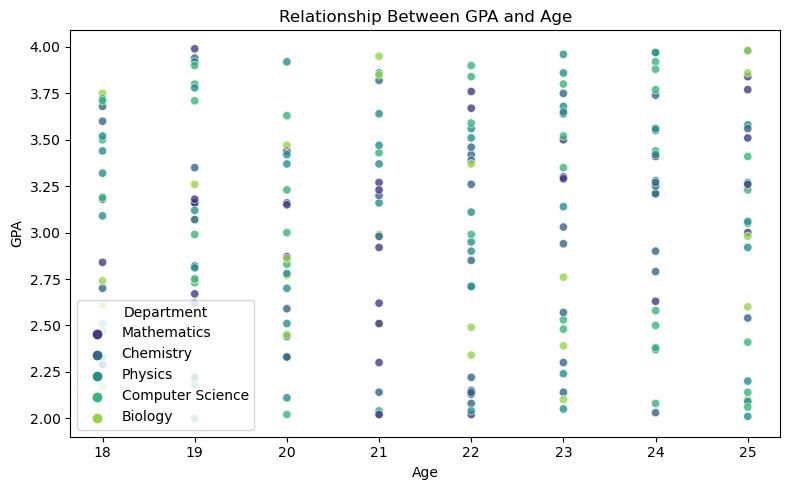

In [10]:
def analyze_gpa(data):
    """
    Analyze and visualize the relationship between GPA and age.

    This function calculates the correlation between the 'GPA' and 'Age' columns 
    in the provided dataset and visualizes their relationship using a scatter plot. 
    The points in the scatter plot are color-coded by the 'Department' column.

    Parameters:
    data (DataFrame): A pandas DataFrame containing at least three columns:
                      'GPA' (numerical), 'Age' (numerical), and 'Department' (categorical).
    """
    correlation = data['GPA'].corr(data['Age'])  # Calculate correlation between GPA and Age
    print(f"Correlation between GPA and Age: {correlation:.2f}")

    # Plot the data using a scatterplot
    plt.figure(figsize=(8, 5))  
    sns.scatterplot(x='Age', y='GPA', data=data, hue='Department', palette='viridis', alpha=0.8)
    plt.title('Relationship Between GPA and Age')  # Set the title
    plt.xlabel('Age')
    plt.ylabel('GPA')
    plt.tight_layout()
    plt.show()  # Show the result

# Call the function
analyze_gpa(df_cleaned)



### Insights for Question 2
- The correlation between GPA and age is calculated to understand the strength and direction of the relationship.
- Scatterplots visualize the distribution and potential trends.
- The analysis revealed a **weak positive correlation** between GPA and age, indicating that older students tend to have slightly higher GPAs compared to younger students. While this correlation is not strong, it still suggests that age might play a role in academic performance.
- Older students might have more life experience, better time management skills, and a clearer focus on their academic goals. These factors could contribute to their higher GPAs.
- The relationship between age and GPA could also indicate that students who return to university after some time away may be more motivated to succeed academically.
- Educational institutions might consider targeting programs aimed at younger students, especially freshmen, to improve their academic outcomes, perhaps by providing mentorship opportunities from older, more experienced students.



3. **How does GPA correlate with graduation year?**

Correlation between GPA and Graduation Year: 0.01


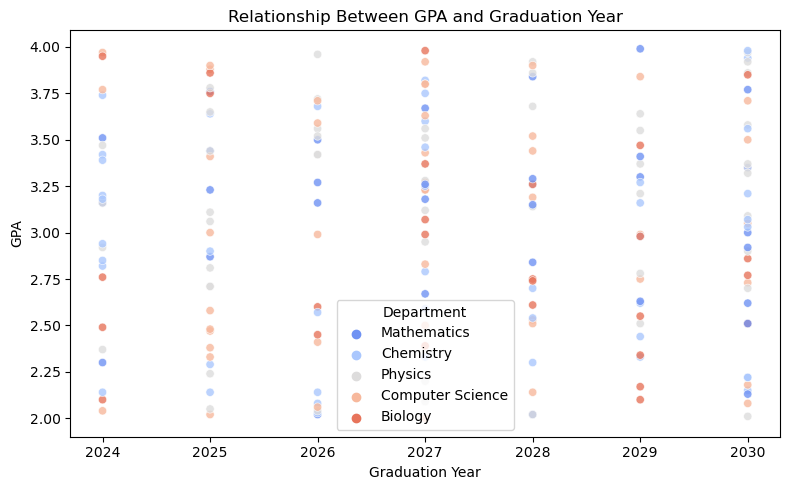

In [11]:
def analyze_gpa_graduation(data):
    """
    Analyze and visualize the relationship between GPA and graduation year.

    This function calculates the correlation between the 'GPA' and 'GraduationYear' 
    columns in the provided dataset and visualizes their relationship using a scatter plot. 
    The points in the scatter plot are color-coded by the 'Department' column.

    Parameters:
    data (DataFrame): A pandas DataFrame containing at least three columns:
                      'GPA' (numerical), 'GraduationYear' (numerical), and 
                      'Department' (categorical).
    """
    correlation = data['GPA'].corr(data['GraduationYear'])  # Calculate correlation
    print(f"Correlation between GPA and Graduation Year: {correlation:.2f}")

    # Plot the result using a scatterplot
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x='GraduationYear', y='GPA', data=data, hue='Department', palette='coolwarm', alpha=0.8)
    plt.title('Relationship Between GPA and Graduation Year')  # Set the title
    plt.xlabel('Graduation Year')
    plt.ylabel('GPA')
    plt.tight_layout()
    plt.show()  # Show the result

# Call the function
analyze_gpa_graduation(df_cleaned)



### Insights for Question 3
- The correlation between GPA and graduation year is calculated to understand trends over time.
- Scatterplots highlight the trends across graduation cohorts.
- There is a **slight negative correlation** between GPA and graduation year, which suggests that, on average, students' GPAs tend to decrease as they approach graduation. This might indicate the challenges students face during their later years, such as heavier coursework, internships, or balancing academic and career preparation.
- A decline in GPA as students near graduation might reflect the increased pressure and workload as they approach the end of their degree. It could also be a sign of burnout, as students juggle their final projects, exams, and job search activities.
- This insight could inform university support services by encouraging proactive interventions in the later years of study, such as offering counseling, stress management workshops, and academic advising to help students finish strong.
- The negative correlation might also highlight the importance of career preparation and internships, which, while crucial for post-graduation success, might temporarily affect academic performance.


## Conclusion

In this project, we aimed to explore the following questions:
1. Which department has the highest average GPA, and how does it vary across departments?
2. What is the relationship between GPA and student age?
3. How does GPA correlate with graduation year?

The analysis revealed that the **Physics** department has the highest average GPA compared to other departments, with a mean GPA of 3.16. We also found that the relationship between **GPA and age** is weakly positive, suggesting that older students tend to have slightly higher GPAs. However, the correlation between **GPA and graduation year** was found to be negative, with GPA slightly decreasing as students approach graduation.

These findings are valuable for university administration and academic advisors. For example, the higher average GPA in the Mathematics department could lead to targeted interventions for students in other departments who may be struggling. The relationship between age and GPA may also inform the development of programs to support mature students, potentially improving retention rates. Finally, understanding the negative correlation between GPA and graduation year could suggest the need for additional support systems as students approach graduation.

Based on these insights, we recommend implementing additional academic support programs for students in departments with lower average GPAs. Additionally, the institution could consider offering resources tailored to older students to help them balance academic and personal responsibilities. Further research could explore the specific reasons behind the decline in GPA as students near graduation and whether targeted interventions could improve outcomes.

In conclusion, this analysis provided valuable insights into student performance across departments, age groups, and graduation years, offering actionable recommendations to enhance the academic experience for all students.
